<a href="https://colab.research.google.com/github/feralex45/qEEG2/blob/main/BrainPainter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BrainPainter - Brain Coloring Software
### Author - Razvan V. Marinescu

BrainPainter is a software for colouring brain images using any used-defined input. For each brain region it takes values from a 0-1 (or 0-max), and colours the brain regions according to these numbers. Numbers could represent biomarkers or absolutely anything.

![](https://brainpainter.csail.mit.edu/static/diagram_front_page.png)

In [ ]:
#@title Press the play button to install BrainPainter (takes 1 min). Give permissions to the pop-up. { form-width: "50px", display-mode: "form" }
# Install Blender

%%capture

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

os.environ["LD_PRELOAD"] = ""

!apt remove libtcmalloc-minimal4
!apt install libtcmalloc-minimal4

os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0"

# loading blender from google drive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1BR1gf56VQCHrFTRAAbLm00qZ_-NceAAD'

download = drive.CreateFile({'id': file_id})

# sets up local file
download.GetContentFile('blender-2.79-linux-glibc219-x86_64_configured.zip')

!unzip blender-2.79-linux-glibc219-x86_64_configured.zip

# if you still get any errors regarding LD_PRELOAD you can check whether a good path is applied (if the version of library has not changed)
!dpkg -L libtcmalloc-minimal4

!ln -s /content/blender-2.79-linux-glibc219-x86_64/blender /usr/local/bin/blender
!blender -v

# load the BrainPainter repo
!git clone https://github.com/razvanmarinescu/brainpainter-colab.git brainpainter
%cd brainpainter

In [ ]:
#@title Upload the CSV file you want to use
# Prompt users to upload files
from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))

Saving DK_template_Belen.csv to DK_template_Belen (1).csv


####If you prefer to use a template file, you can find one for each of the 4 available atlases [here](https://drive.google.com/drive/folders/19At2LS8i_VPBmlOYEXgfRQh8smesI_aA?usp=sharing)







---



In [ ]:
#@title Specify Image Parameters
#@markdown ## File Locations

#@markdown #### **Note**: the program uses the last file you uploaded as the source for the images.
# input_file = 'input/mouse_template.csv' # here for testing
output_folder = "temp" #@param {type:"string"}

#@markdown ## Brain Details

atlas = "DK" #@param ["DK", "Destrieux", "Tourville", "Mice"]
brain_type = "'white' (white-matter surface)" #@param ["'pial' (with gyri/sulci)", "'inflated' (smooth)", "'white' (white-matter surface)"]

# TODO: make selectable modes
# define img_list instead of modes; running everything now
# img_list = ['subcortical-outer-right-hemisphere',
#             'subcortical-outer-left-hemisphere',
#             'subcortical-top',
#             'subcortical-bottom',
#             'cortical-outer-right-hemisphere',
#             'cortical-inner-right-hemisphere',
#             'cortical-outer-left-hemisphere',
#             'cortical-inner-left-hemisphere',
#             'cortical-top',
#             'cortical-bottom']

#@markdown ## Diagram Colors

color_0 = "blue" #@param["red", "orange", "yellow", "green", "blue", "purple", "grey", "black", "white"]
color_1 = "green" #@param["red", "orange", "yellow", "green", "blue", "purple", "grey", "black", "white"]
color_2 = "yellow" #@param["red", "orange", "yellow", "green", "blue", "purple", "grey", "black", "white"]
color_3 = "orange" #@param["red", "orange", "yellow", "green", "blue", "purple", "grey", "black", "white"]
color_4 = "red" #@param["red", "orange", "yellow", "green", "blue", "purple", "grey", "black", "white"]

#@markdown ## Background Color

background_color = "black" #@param["red", "orange", "yellow", "green", "blue", "purple", "grey", "black", "white"]

#@markdown ## Resolution (pixels)
image_width = 1200 #@param{type:"number"}
image_height = 900 #@param{type:"number"}

colors = {"red" : (1,0,0),
          "orange" : (1,0.4,0),
          "yellow" : (1,1,0),
          "green" : (0,1,0),
          "blue" : (0,0,1),
          "purple" : (1,0,1),
          "grey" : (0.5,0.5,0.5),
          "black" : (0,0,0),
          "white" : (1,1,1)}

BRAIN_TYPE = 'pial'
if (brain_type == "'inflated' (smooth)"):
    BRAIN_TYPE = 'inflated'
if (brain_type == "'white' (white-matter surface)"):
    BRAIN_TYPE = 'white'

COLORS_RGB = [colors[color_0], colors[color_1], colors[color_2], colors[color_3], colors[color_4]]
BACKGROUND_COLOR = colors[background_color]

RESOLUTION = (image_width, image_height)

input_file = filename

In [ ]:
#@title Select Render Views
#@markdown #### Unchecking a view means that the renderer will not generate that angle. This is recommended if you are generating a significant quantity of atlases and want to speed up the computation time or want to generate a video representation of your renders.
subcortical_outer_right_hemisphere = True # @param {type:"boolean"}
subcortical_outer_left_hemisphere = True # @param {type:"boolean"}
subcortical_top = True # @param {type:"boolean"}
subcortical_bottom = True # @param {type:"boolean"}
cortical_outer_right_hemisphere = True # @param {type:"boolean"}
cortical_inner_right_hemisphere = True # @param {type:"boolean"}
cortical_outer_left_hemisphere = True # @param {type:"boolean"}
cortical_inner_left_hemisphere = True # @param {type:"boolean"}
cortical_top = True # @param {type:"boolean"}
cortical_bottom = True # @param {type:"boolean"}

img_list = []

if subcortical_outer_right_hemisphere:
    img_list.append("subcortical-outer-right-hemisphere")
if subcortical_outer_left_hemisphere:
    img_list.append("subcortical-outer-left-hemisphere")
if subcortical_top:
    img_list.append("subcortical-top")
if subcortical_bottom:
    img_list.append("subcortical-bottom")
if cortical_outer_right_hemisphere:
    img_list.append("cortical-outer-right-hemisphere")
if cortical_inner_right_hemisphere:
    img_list.append("cortical-inner-right-hemisphere")
if cortical_outer_left_hemisphere:
    img_list.append("cortical-outer-left-hemisphere")
if cortical_inner_left_hemisphere:
    img_list.append("cortical-inner-left-hemisphere")
if cortical_top:
    img_list.append("cortical-top")
if cortical_bottom:
    img_list.append("cortical-bottom")

In [ ]:
#@title Advanced Script Settings
#@markdown Most users will not need to edit these fields.
#@markdown If you need something specific, click **Show code** and adjust the values you need.
#@markdown Click the play button once you are ready to proceed.


'''
### Advanced settings, only change if you want to use custom atlas or if you'd like to not color at all some regions ###

# map the names of each 3D cortical structure to be coloured to the name of the structure you have in your atlas.
# only change the right-hand side values, as the left-hand side are used by blender.

# Common customisations:
# 1. to completely remove a region from being displayed, remove both the (key,value) pair.
# 2. to deactivate a region (always color it in default dark gray color), map its value to -1

# NOTE: Always make sure the RHS regions (dict values) below are present in your input .csv file.
'''

### DK atlas ###

# Left-Hand-Side = Blender Regions   Right-Hand-Side = Regions in custom input atlas (.csv INPUT_FILE)
# disable any regions by setting its RHS to -1

cortAreasIndexMapDK = {
  'Right-bankssts':'Right-bankssts',
  'Right-caudalanteriorcingulate':'Right-caudalanteriorcingulate',
  'Right-caudalmiddlefrontal':'Right-caudalmiddlefrontal',
  'Right-cuneus':'Right-cuneus',
  'Right-entorhinal':'Right-entorhinal',
  'Right-frontalpole': 'Right-frontalpole',
  'Right-fusiform':'Right-fusiform',
  'Right-inferiorparietal':'Right-inferiorparietal',
  'Right-inferiortemporal':'Right-inferiortemporal',
  'Right-insula':'Right-insula',
  'Right-isthmuscingulate':'Right-isthmuscingulate',
  'Right-lateraloccipital':'Right-lateraloccipital',
  'Right-lateralorbitofrontal':'Right-lateralorbitofrontal',
  'Right-lingual':'Right-lingual',
  'Right-medialorbitofrontal':'Right-medialorbitofrontal',
  'Right-middletemporal':'Right-middletemporal',
  'Right-paracentral':'Right-paracentral',
  'Right-parahippocampal':'Right-parahippocampal',
  'Right-parsopercularis':'Right-parsopercularis',
  'Right-parsorbitalis':'Right-parsorbitalis',
  'Right-parstriangularis':'Right-parstriangularis',
  'Right-pericalcarine':'Right-pericalcarine',
  'Right-postcentral':'Right-postcentral',
  'Right-posteriorcingulate':'Right-posteriorcingulate',
  'Right-precentral':'Right-precentral',
  'Right-precuneus':'Right-precuneus',
  'Right-rostralanteriorcingulate':'Right-rostralanteriorcingulate',
  'Right-rostralmiddlefrontal':'Right-rostralmiddlefrontal',
  'Right-superiorfrontal':'Right-superiorfrontal',
  'Right-superiorparietal':'Right-superiorparietal',
  'Right-superiortemporal':'Right-superiortemporal',
  'Right-supramarginal':'Right-supramarginal',
  'Right-temporalpole':'Right-temporalpole',
  'Right-transversetemporal':'Right-transversetemporal',
  'Right-unknown':-1, # this is actually the middle region inside the cortical surface. color it as gray
  'Left-bankssts':'Left-bankssts',
  'Left-caudalanteriorcingulate':'Left-caudalanteriorcingulate',
  'Left-caudalmiddlefrontal':'Left-caudalmiddlefrontal',
  'Left-cuneus':'Left-cuneus',
  'Left-entorhinal':'Left-entorhinal',
  'Left-frontalpole': 'Left-frontalpole',
  'Left-fusiform':'Left-fusiform',
  'Left-inferiorparietal':'Left-inferiorparietal',
  'Left-inferiortemporal':'Left-inferiortemporal',
  'Left-insula':'Left-insula',
  'Left-isthmuscingulate':'Left-isthmuscingulate',
  'Left-lateraloccipital':'Left-lateraloccipital',
  'Left-lateralorbitofrontal':'Left-lateralorbitofrontal',
  'Left-lingual':'Left-lingual',
  'Left-medialorbitofrontal':'Left-medialorbitofrontal',
  'Left-middletemporal':'Left-middletemporal',
  'Left-paracentral':'Left-paracentral',
  'Left-parahippocampal':'Left-parahippocampal',
  'Left-parsopercularis':'Left-parsopercularis',
  'Left-parsorbitalis':'Left-parsorbitalis',
  'Left-parstriangularis':'Left-parstriangularis',
  'Left-pericalcarine':'Left-pericalcarine',
  'Left-postcentral':'Left-postcentral',
  'Left-posteriorcingulate':'Left-posteriorcingulate',
  'Left-precentral':'Left-precentral',
  'Left-precuneus':'Left-precuneus',
  'Left-rostralanteriorcingulate':'Left-rostralanteriorcingulate',
  'Left-rostralmiddlefrontal':'Left-rostralmiddlefrontal',
  'Left-superiorfrontal':'Left-superiorfrontal',
  'Left-superiorparietal':'Left-superiorparietal',
  'Left-superiortemporal':'Left-superiortemporal',
  'Left-supramarginal':'Left-supramarginal',
  'Left-temporalpole':'Left-temporalpole',
  'Left-transversetemporal':'Left-transversetemporal',
  'Left-unknown':-1 # this is actually the middle region inside the cortical surface. color it as gray
}


### Destrieux atlas ###

# Left-Hand-Side = Blender Regions   Right-Hand-Side = Regions in custom input atlas (.csv INPUT_FILE)
cortAreasIndexMapDestrieux = {
    'Right-G_and_S_frontomargin': 'Right-G_and_S_frontomargin',
    'Right-G_and_S_occipital_inf': 'Right-G_and_S_occipital_inf',
    'Right-G_and_S_paracentral': 'Right-G_and_S_paracentral',
    'Right-G_and_S_subcentral': 'Right-G_and_S_subcentral',
    'Right-G_and_S_transv_frontopol': 'Right-G_and_S_transv_frontopol' ,
    'Right-G_and_S_cingul-Ant': 'Right-G_and_S_cingul-Ant',
    'Right-G_and_S_cingul-Mid-Ant': 'Right-G_and_S_cingul-Mid-Ant',
    'Right-G_and_S_cingul-Mid-Post': 'Right-G_and_S_cingul-Mid-Post',
    'Right-G_cingul-Post-dorsal': 'Right-G_cingul-Post-dorsal',
    'Right-G_cingul-Post-ventral': 'Right-G_cingul-Post-ventral',
    'Right-G_cuneus': 'Right-G_cuneus',
    'Right-G_front_inf-Opercular': 'Right-G_front_inf-Opercular',
    'Right-G_front_inf-Orbital': 'Right-G_front_inf-Orbital',
    'Right-G_front_inf-Triangul': 'Right-G_front_inf-Triangul' ,
    'Right-G_front_middle': 'Right-G_front_middle',
    'Right-G_front_sup': 'Right-G_front_sup',
    'Right-G_Ins_lg_and_S_cent_ins': 'Right-G_Ins_lg_and_S_cent_ins',
    'Right-G_insular_short': 'Right-G_insular_short',
    'Right-G_occipital_middle': 'Right-G_occipital_middle',
    'Right-G_occipital_sup': 'Right-G_occipital_sup',
    'Right-G_oc-temp_lat-fusifor': 'Right-G_oc-temp_lat-fusifor',
    'Right-G_oc-temp_med-Lingual': 'Right-G_oc-temp_med-Lingual' ,
    'Right-G_oc-temp_med-Parahip': 'Right-G_oc-temp_med-Parahip' ,
    'Right-G_orbital': 'Right-G_orbital',
    'Right-G_pariet_inf-Angular': 'Right-G_pariet_inf-Angular',
    'Right-G_pariet_inf-Supramar': 'Right-G_pariet_inf-Supramar',
    'Right-G_parietal_sup': 'Right-G_parietal_sup',
    'Right-G_postcentral': 'Right-G_postcentral',
    'Right-G_precentral': 'Right-G_precentral',
    'Right-G_precuneus': 'Right-G_precuneus',
    'Right-G_rectus': 'Right-G_rectus',
    'Right-G_subcallosal': 'Right-G_subcallosal',
    'Right-G_temp_sup-G_T_transv': 'Right-G_temp_sup-G_T_transv',
    'Right-G_temp_sup-Lateral': 'Right-G_temp_sup-Lateral',
    'Right-G_temp_sup-Plan_polar': 'Right-G_temp_sup-Plan_polar' ,
    'Right-G_temp_sup-Plan_tempo': 'Right-G_temp_sup-Plan_tempo' ,
    'Right-G_temporal_inf': 'Right-G_temporal_inf',
    'Right-G_temporal_middle': 'Right-G_temporal_middle',
    'Right-Lat_Fis-ant-Horizont': 'Right-Lat_Fis-ant-Horizont',
    'Right-Lat_Fis-ant-Vertical': 'Right-Lat_Fis-ant-Vertical',
    'Right-Lat_Fis-post': 'Right-Lat_Fis-post',
    'Right-Pole_occipital': 'Right-Pole_occipital',
    'Right-Pole_temporal': 'Right-Pole_temporal',
    'Right-S_calcarine': 'Right-S_calcarine',
    'Right-S_central': 'Right-S_central',
    'Right-S_cingul-Marginalis': 'Right-S_cingul-Marginalis',
    'Right-S_circular_insula_ant': 'Right-S_circular_insula_ant',
    'Right-S_circular_insula_inf': 'Right-S_circular_insula_inf',
    'Right-S_circular_insula_sup': 'Right-S_circular_insula_sup',
    'Right-S_collat_transv_ant': 'Right-S_collat_transv_ant',
    'Right-S_collat_transv_post': 'Right-S_collat_transv_post',
    'Right-S_front_inf': 'Right-S_front_inf',
    'Right-S_front_middle': 'Right-S_front_middle',
    'Right-S_front_sup': 'Right-S_front_sup',
    'Right-S_interm_prim-Jensen': 'Right-S_interm_prim-Jensen',
    'Right-S_intrapariet_and_P_trans': 'Right-S_intrapariet_and_P_trans',
    'Right-S_oc_middle_and_Lunatus': 'Right-S_oc_middle_and_Lunatus',
    'Right-S_oc_sup_and_transversal': 'Right-S_oc_sup_and_transversal',
    'Right-S_occipital_ant': 'Right-S_occipital_ant',
    'Right-S_oc-temp_lat': 'Right-S_oc-temp_lat',
    'Right-S_oc-temp_med_and_Lingual': 'Right-S_oc-temp_med_and_Lingual',
    'Right-S_orbital_lateral': 'Right-S_orbital_lateral',
    'Right-S_orbital_med-olfact': 'Right-S_orbital_med-olfact',
    'Right-S_orbital-H_Shaped': 'Right-S_orbital-H_Shaped',
    'Right-S_parieto_occipital': 'Right-S_parieto_occipital',
    'Right-S_pericallosal': 'Right-S_pericallosal',
    'Right-S_postcentral': 'Right-S_postcentral',
    'Right-S_precentral-inf-part': 'Right-S_precentral-inf-part',
    'Right-S_precentral-sup-part': 'Right-S_precentral-sup-part',
    'Right-S_suborbital': 'Right-S_suborbital',
    'Right-S_subparietal': 'Right-S_subparietal',
    'Right-S_temporal_inf': 'Right-S_temporal_inf',
    'Right-S_temporal_sup': 'Right-S_temporal_sup',
    'Right-S_temporal_transverse': 'Right-S_temporal_transverse',
    'Right-Unknown':-1, # this is actually the middle region inside the cortical surface. color it as gray
    'Left-G_and_S_frontomargin': 'Left-G_and_S_frontomargin',
    'Left-G_and_S_occipital_inf': 'Left-G_and_S_occipital_inf',
    'Left-G_and_S_paracentral': 'Left-G_and_S_paracentral',
    'Left-G_and_S_subcentral': 'Left-G_and_S_subcentral',
    'Left-G_and_S_transv_frontopol': 'Left-G_and_S_transv_frontopol' ,
    'Left-G_and_S_cingul-Ant': 'Left-G_and_S_cingul-Ant',
    'Left-G_and_S_cingul-Mid-Ant': 'Left-G_and_S_cingul-Mid-Ant',
    'Left-G_and_S_cingul-Mid-Post': 'Left-G_and_S_cingul-Mid-Post',
    'Left-G_cingul-Post-dorsal': 'Left-G_cingul-Post-dorsal',
    'Left-G_cingul-Post-ventral': 'Left-G_cingul-Post-ventral',
    'Left-G_cuneus': 'Left-G_cuneus',
    'Left-G_front_inf-Opercular': 'Left-G_front_inf-Opercular',
    'Left-G_front_inf-Orbital': 'Left-G_front_inf-Orbital',
    'Left-G_front_inf-Triangul': 'Left-G_front_inf-Triangul' ,
    'Left-G_front_middle': 'Left-G_front_middle',
    'Left-G_front_sup': 'Left-G_front_sup',
    'Left-G_Ins_lg_and_S_cent_ins': 'Left-G_Ins_lg_and_S_cent_ins',
    'Left-G_insular_short': 'Left-G_insular_short',
    'Left-G_occipital_middle': 'Left-G_occipital_middle',
    'Left-G_occipital_sup': 'Left-G_occipital_sup',
    'Left-G_oc-temp_lat-fusifor': 'Left-G_oc-temp_lat-fusifor',
    'Left-G_oc-temp_med-Lingual': 'Left-G_oc-temp_med-Lingual' ,
    'Left-G_oc-temp_med-Parahip': 'Left-G_oc-temp_med-Parahip' ,
    'Left-G_orbital': 'Left-G_orbital',
    'Left-G_pariet_inf-Angular': 'Left-G_pariet_inf-Angular',
    'Left-G_pariet_inf-Supramar': 'Left-G_pariet_inf-Supramar',
    'Left-G_parietal_sup': 'Left-G_parietal_sup',
    'Left-G_postcentral': 'Left-G_postcentral',
    'Left-G_precentral': 'Left-G_precentral',
    'Left-G_precuneus': 'Left-G_precuneus',
    'Left-G_rectus': 'Left-G_rectus',
    'Left-G_subcallosal': 'Left-G_subcallosal',
    'Left-G_temp_sup-G_T_transv': 'Left-G_temp_sup-G_T_transv',
    'Left-G_temp_sup-Lateral': 'Left-G_temp_sup-Lateral',
    'Left-G_temp_sup-Plan_polar': 'Left-G_temp_sup-Plan_polar' ,
    'Left-G_temp_sup-Plan_tempo': 'Left-G_temp_sup-Plan_tempo' ,
    'Left-G_temporal_inf': 'Left-G_temporal_inf',
    'Left-G_temporal_middle': 'Left-G_temporal_middle',
    'Left-Lat_Fis-ant-Horizont': 'Left-Lat_Fis-ant-Horizont',
    'Left-Lat_Fis-ant-Vertical': 'Left-Lat_Fis-ant-Vertical',
    'Left-Lat_Fis-post': 'Left-Lat_Fis-post',
    'Left-Pole_occipital': 'Left-Pole_occipital',
    'Left-Pole_temporal': 'Left-Pole_temporal',
    'Left-S_calcarine': 'Left-S_calcarine',
    'Left-S_central': 'Left-S_central',
    'Left-S_cingul-Marginalis': 'Left-S_cingul-Marginalis',
    'Left-S_circular_insula_ant': 'Left-S_circular_insula_ant',
    'Left-S_circular_insula_inf': 'Left-S_circular_insula_inf',
    'Left-S_circular_insula_sup': 'Left-S_circular_insula_sup',
    'Left-S_collat_transv_ant': 'Left-S_collat_transv_ant',
    'Left-S_collat_transv_post': 'Left-S_collat_transv_post',
    'Left-S_front_inf': 'Left-S_front_inf',
    'Left-S_front_middle': 'Left-S_front_middle',
    'Left-S_front_sup': 'Left-S_front_sup',
    'Left-S_interm_prim-Jensen': 'Left-S_interm_prim-Jensen',
    'Left-S_intrapariet_and_P_trans': 'Left-S_intrapariet_and_P_trans',
    'Left-S_oc_middle_and_Lunatus': 'Left-S_oc_middle_and_Lunatus',
    'Left-S_oc_sup_and_transversal': 'Left-S_oc_sup_and_transversal',
    'Left-S_occipital_ant': 'Left-S_occipital_ant',
    'Left-S_oc-temp_lat': 'Left-S_oc-temp_lat',
    'Left-S_oc-temp_med_and_Lingual': 'Left-S_oc-temp_med_and_Lingual',
    'Left-S_orbital_lateral': 'Left-S_orbital_lateral',
    'Left-S_orbital_med-olfact': 'Left-S_orbital_med-olfact',
    'Left-S_orbital-H_Shaped': 'Left-S_orbital-H_Shaped',
    'Left-S_parieto_occipital': 'Left-S_parieto_occipital',
    'Left-S_pericallosal': 'Left-S_pericallosal',
    'Left-S_postcentral': 'Left-S_postcentral',
    'Left-S_precentral-inf-part': 'Left-S_precentral-inf-part',
    'Left-S_precentral-sup-part': 'Left-S_precentral-sup-part',
    'Left-S_suborbital': 'Left-S_suborbital',
    'Left-S_subparietal': 'Left-S_subparietal',
    'Left-S_temporal_inf': 'Left-S_temporal_inf',
    'Left-S_temporal_sup': 'Left-S_temporal_sup',
    'Left-S_temporal_transverse': 'Left-S_temporal_transverse',
    'Left-Unknown':-1, # this is actually the middle region inside the cortical surface. color it as gray
}


### Mouse brain atlas ###

# Left-Hand-Side = Blender Regions   Right-Hand-Side = Regions in custom input atlas (.csv INPUT_FILE)
cortAreasIndexMapMice = {
  'Right-Anterior-cingulate': 'Right-Anterior-cingulate',
  'Right-Auditory': 'Right-Auditory',
  'Right-Cortical-subplate': 'Right-Cortical-subplate',
  'Right-Gustatory': 'Right-Gustatory',
  'Right-Infralimbic': 'Right-Infralimbic',
  'Right-Medulla': 'Right-Medulla',
  'Right-Olfactory': 'Right-Olfactory',
  'Right-Pons': 'Right-Pons',
  'Right-Prelimbic': 'Right-Prelimbic',
  'Right-Retrosplenial': 'Right-Retrosplenial',
  'Right-Somatomotor': 'Right-Somatomotor',
  'Right-Somatosensory': 'Right-Somatosensory',
  'Right-Striatum': 'Right-Striatum',
  'Right-Visceral': 'Right-Visceral',
  'Right-Visual': 'Right-Visual',
  'Right-Agranular-insular-area': 'Right-Agranular-insular-area',
  'Right-Posterior-parietal-association-areas': 'Right-Posterior-parietal-association-areas',
  'Right-Temporal-association-areas': 'Right-Temporal-association-areas',
  'Right-Perirhinal': 'Right-Perirhinal',
  'Right-Ectorhinal': 'Right-Ectorhinal',
  'Left-Anterior-cingulate': 'Left-Anterior-cingulate',
  'Left-Auditory': 'Left-Auditory',
  'Left-Cortical-subplate': 'Left-Cortical-subplate',
  'Left-Gustatory': 'Left-Gustatory',
  'Left-Infralimbic': 'Left-Infralimbic',
  'Left-Medulla': 'Left-Medulla',
  'Left-Olfactory': 'Left-Olfactory',
  'Left-Pons': 'Left-Pons',
  'Left-Prelimbic': 'Left-Prelimbic',
  'Left-Retrosplenial': 'Left-Retrosplenial',
  'Left-Somatomotor': 'Left-Somatomotor',
  'Left-Somatosensory': 'Left-Somatosensory',
  'Left-Striatum': 'Left-Striatum',
  'Left-Visceral': 'Left-Visceral',
  'Left-Visual': 'Left-Visual',
  'Left-Agranular-insular-area': 'Left-Agranular-insular-area',
  'Left-Posterior-parietal-association-areas': 'Left-Posterior-parietal-association-areas',
  'Left-Temporal-association-areas': 'Left-Temporal-association-areas',
  'Left-Perirhinal': 'Left-Perirhinal',
  'Left-Ectorhinal': 'Left-Ectorhinal',
}


### Mouse brain atlas ###

# Left-Hand-Side = Blender Regions   Right-Hand-Side = Regions in custom input atlas (.csv INPUT_FILE)
cortAreasIndexMapMice = {
  'Right-Anterior-cingulate': 'Right-Anterior-cingulate',
  'Right-Auditory': 'Right-Auditory',
  'Right-Cortical-subplate': 'Right-Cortical-subplate',
  'Right-Gustatory': 'Right-Gustatory',
  'Right-Infralimbic': 'Right-Infralimbic',
  'Right-Medulla': 'Right-Medulla',
  'Right-Olfactory': 'Right-Olfactory',
  'Right-Pons': 'Right-Pons',
  'Right-Prelimbic': 'Right-Prelimbic',
  'Right-Retrosplenial': 'Right-Retrosplenial',
  'Right-Somatomotor': 'Right-Somatomotor',
  'Right-Somatosensory': 'Right-Somatosensory',
  'Right-Striatum': 'Right-Striatum',
  'Right-Visceral': 'Right-Visceral',
  'Right-Visual': 'Right-Visual',
  'Right-Agranular-insular-area': 'Right-Agranular-insular-area',
  'Right-Posterior-parietal-association-areas': 'Right-Posterior-parietal-association-areas',
  'Right-Temporal-association-areas': 'Right-Temporal-association-areas',
  'Right-Perirhinal': 'Right-Perirhinal',
  'Right-Ectorhinal': 'Right-Ectorhinal',
  'Left-Anterior-cingulate': 'Left-Anterior-cingulate',
  'Left-Auditory': 'Left-Auditory',
  'Left-Cortical-subplate': 'Left-Cortical-subplate',
  'Left-Gustatory': 'Left-Gustatory',
  'Left-Infralimbic': 'Left-Infralimbic',
  'Left-Medulla': 'Left-Medulla',
  'Left-Olfactory': 'Left-Olfactory',
  'Left-Pons': 'Left-Pons',
  'Left-Prelimbic': 'Left-Prelimbic',
  'Left-Retrosplenial': 'Left-Retrosplenial',
  'Left-Somatomotor': 'Left-Somatomotor',
  'Left-Somatosensory': 'Left-Somatosensory',
  'Left-Striatum': 'Left-Striatum',
  'Left-Visceral': 'Left-Visceral',
  'Left-Visual': 'Left-Visual',
  'Left-Agranular-insular-area': 'Left-Agranular-insular-area',
  'Left-Posterior-parietal-association-areas': 'Left-Posterior-parietal-association-areas',
  'Left-Temporal-association-areas': 'Left-Temporal-association-areas',
  'Left-Perirhinal': 'Left-Perirhinal',
  'Left-Ectorhinal': 'Left-Ectorhinal',
}


# subcortical areas for mouse atlas
subcortMouseAreasIndexMap = {
  'Left-Cerebellum':'Left-Cerebellum', # -1 means do not colour this region
  'Left-Hypothalamus':'Left-Hypothalamus',
  'Left-Frontal-pole': 'Left-Frontal-pole', # Acronym for Frontal pole, cerebral cortex,
  'Left-Hippocampus': 'Left-Hippocampus',
  'Left-Midbrain':'Left-Midbrain',
  'Left-Pallidum': 'Left-Pallidum',
  'Left-Thalamus':'Left-Thalamus',

  'Right-Cerebellum':'Right-Cerebellum', # -1 means do not colour this region
  'Right-Hypothalamus':'Right-Hypothalamus',
  'Right-Frontal-pole': 'Right-Frontal-pole', # Acronym for Frontal pole, cerebral cortex,
  'Right-Hippocampus': 'Right-Hippocampus',
  'Right-Midbrain':'Right-Midbrain',
  'Right-Pallidum': 'Right-Pallidum',
  'Right-Thalamus':'Right-Thalamus'
}


# subcortical regions for the dorr atlas
subcortDorrAreasIndexMap = {
  'bilateral_cerebral_aqueduct': 'bilateral_cerebral_aqueduct',
  'bilateral_fourth_ventricle': 'bilateral_fourth_ventricle',
  'bilateral_interpedunclar_nucleus': 'bilateral_interpedunclar_nucleus',
  'bilateral_medulla': 'bilateral_medulla',
  'bilateral_midbrain': 'bilateral_midbrain',
  'bilateral_periaqueductal_grey': 'bilateral_periaqueductal_grey',
  'bilateral_pons': 'bilateral_pons',
  'bilateral_posterior_commissure': 'bilateral_posterior_commissure',
  'bilateral_third_ventricle': 'bilateral_third_ventricle',
  'bilateral_ventral_tegmental_decussation': 'bilateral_ventral_tegmental_decussation',
}


# subcortical regions for the dsurque atlas
subcortDsurqueAreasIndexMap = {
  'bilateral_cerebral_aqueduct': 'bilateral_cerebral_aqueduct',
  'bilateral_fourth_ventricle': 'bilateral_fourth_ventricle',
  'bilateral_interpedunclar_nucleus': 'bilateral_interpedunclar_nucleus',
  'bilateral_lobule_10_nodulus': 'bilateral_lobule_10_nodulus',
  'bilateral_lobule_10_white_matter': 'bilateral_lobule_10_white_matter',
  'bilateral_lobule_1_2_white_matter': 'bilateral_lobule_1_2_white_matter',
  'bilateral_lobule_3_central_lobule_dorsal': 'bilateral_lobule_3_central_lobule_dorsal',
  'bilateral_lobule_3_white_matter': 'bilateral_lobule_3_white_matter',
  'bilateral_lobule_6_declive': 'bilateral_lobule_6_declive',
  'bilateral_lobule_7_tuber_or_folium': 'bilateral_lobule_7_tuber_or_folium',
  'bilateral_lobule_8_pyramis': 'bilateral_lobule_8_pyramis',
  'bilateral_lobule_8_white_matter': 'bilateral_lobule_8_white_matter',
  'bilateral_lobule_9_uvula': 'bilateral_lobule_9_uvula',
  'bilateral_lobule_9_white_matter': 'bilateral_lobule_9_white_matter',
  'bilateral_lobules_1_2_lingula_and_central_lobule_ventral': 'bilateral_lobules_1_2_lingula_and_central_lobule_ventral',
  'bilateral_lobules_4_5_culmen_ventral_and_dorsal': 'bilateral_lobules_4_5_culmen_ventral_and_dorsal',
  'bilateral_lobules_4_5_white_matter': 'bilateral_lobules_4_5_white_matter',
  'bilateral_lobules_6_7_white_matter': 'bilateral_lobules_6_7_white_matter',
  'bilateral_medulla': 'bilateral_medulla',
  'bilateral_midbrain': 'bilateral_midbrain',
  'bilateral_periaqueductal_grey': 'bilateral_periaqueductal_grey',
  'bilateral_pons': 'bilateral_pons',
  'bilateral_posterior_commissure': 'bilateral_posterior_commissure',
  'bilateral_third_ventricle': 'bilateral_third_ventricle',
  'bilateral_trunk_of_arbor_vita': 'bilateral_trunk_of_arbor_vita',
  'bilateral_trunk_of_lobules_1_3_white_matter': 'bilateral_trunk_of_lobules_1_3_white_matter',
  'bilateral_trunk_of_lobules_6_8_white_matter': 'bilateral_trunk_of_lobules_6_8_white_matter',
  'bilateral_ventral_tegmental_decussation': 'bilateral_ventral_tegmental_decussation',
}

cortAreasIndexMapDsurque = {
  'Left-accessory_olfactory_bulb_glomerular_external_plexiform_and_mitral_cell_layer': 'Left-accessory_olfactory_bulb_glomerular_external_plexiform_and_mitral_cell_layer',
  'Left-accessory_olfdactory_bulb_granule_cell_layer': 'Left-accessory_olfactory_bulb_granule_cell_layer',
  'Left-amygdala': 'Left-amygdala',
  'Left-amygdalopiriform_transition_area': 'Left-amygdalopiriform_transition_area',
  'Left-anterior_commissure_pars_anterior': 'Left-anterior_commissure_pars_anterior',
  'Left-anterior_commissure_pars_posterior': 'Left-anterior_commissure_pars_posterior',
  'Left-anterior_lobule_lobules_4_5': 'Left-anterior_lobule_lobules_4_5',
  'Left-anterior_lobule_white_matter': 'Left-anterior_lobule_white_matter',
  'Left-anterior_olfactory_nucleus': 'Left-anterior_olfactory_nucleus',
  'Left-basal_forebrain': 'Left-basal_forebrain',
  'Left-bed_nucleus_of_stria_terminalis': 'Left-bed_nucleus_of_stria_terminalis',
  'Left-ca10r': 'Left-ca10r',
  'Left-ca1py': 'Left-ca1py',
  'Left-ca1rad': 'Left-ca1rad',
  'Left-ca20r': 'Left-ca20r',
  'Left-ca2py': 'Left-ca2py',
  'Left-ca2rad': 'Left-ca2rad',
  'Left-ca30r': 'Left-ca30r',
  'Left-ca3py_inner': 'Left-ca3py_inner',
  'Left-ca3py_outer': 'Left-ca3py_outer',
  'Left-ca3rad': 'Left-ca3rad',
  'Left-caudomedial_entorhinal_cortex': 'Left-caudomedial_entorhinal_cortex',
  'Left-cerebellar_peduncle_inferior': 'Left-cerebellar_peduncle_inferior',
  'Left-cerebellar_peduncle_middle': 'Left-cerebellar_peduncle_middle',
  'Left-cerebellar_peduncle_superior': 'Left-cerebellar_peduncle_superior',
  'Left-cerebral_peduncle': 'Left-cerebral_peduncle',
  'Left-cingulate_cortex_area_24a': 'Left-cingulate_cortex_area_24a',
  'Left-cingulate_cortex_area_24a_2': 'Left-cingulate_cortex_area_24a_2',
  'Left-cingulate_cortex_area_24b': 'Left-cingulate_cortex_area_24b',
  'Left-cingulate_cortex_area_24b_2': 'Left-cingulate_cortex_area_24b_2',
  'Left-cingulate_cortex_area_25': 'Left-cingulate_cortex_area_25',
  'Left-cingulate_cortex_area_29a': 'Left-cingulate_cortex_area_29a',
  'Left-cingulate_cortex_area_29b': 'Left-cingulate_cortex_area_29b',
  'Left-cingulate_cortex_area_29c': 'Left-cingulate_cortex_area_29c',
  'Left-cingulate_cortex_area_30': 'Left-cingulate_cortex_area_30',
  'Left-cingulate_cortex_area_32': 'Left-cingulate_cortex_area_32',
  'Left-cingulum': 'Left-cingulum',
  'Left-claustrum': 'Left-claustrum',
  'Left-claustrum_dorsal_part': 'Left-claustrum_dorsal_part',
  'Left-claustrum_ventral_part': 'Left-claustrum_ventral_part',
  'Left-colliculus_inferior': 'Left-colliculus_inferior',
  'Left-colliculus_superior': 'Left-colliculus_superior',
  'Left-copula_pyramis_lobule_8': 'Left-copula_pyramis_lobule_8',
  'Left-copula_white_matter': 'Left-copula_white_matter',
  'Left-corpus_callosum': 'Left-corpus_callosum',
  'Left-cortex_amygdala_transition_zones': 'Left-cortex_amygdala_transition_zones',
  'Left-corticospinal_tract_pyramids': 'Left-corticospinal_tract_pyramids',
  'Left-crus_1_ansiform_lobule_lobule_6': 'Left-crus_1_ansiform_lobule_lobule_6',
  'Left-crus_1_white_matter': 'Left-crus_1_white_matter',
  'Left-crus_2_ansiform_lobule_lobule_7': 'Left-crus_2_ansiform_lobule_lobule_7',
  'Left-crus_2_white_matter': 'Left-crus_2_white_matter',
  'Left-cuneate_nucleus': 'Left-cuneate_nucleus',
  'Left-dentate_nucleus': 'Left-dentate_nucleus',
  'Left-dorsal_intermediate_entorhinal_cortex': 'Left-dorsal_intermediate_entorhinal_cortex',
  'Left-dorsal_nucleus_of_the_endopiriform': 'Left-dorsal_nucleus_of_the_endopiriform',
  'Left-dorsal_tenia_tecta': 'Left-dorsal_tenia_tecta',
  'Left-dorsolateral_entorhinal_cortex': 'Left-dorsolateral_entorhinal_cortex',
  'Left-dorsolateral_orbital_cortex': 'Left-dorsolateral_orbital_cortex',
  'Left-ectorhinal_cortex': 'Left-ectorhinal_cortex',
  'Left-facial_nerve_cranial_nerve_7': 'Left-facial_nerve_cranial_nerve_7',
  'Left-fasciculus_retroflexus': 'Left-fasciculus_retroflexus',
  'Left-fastigial_nucleus': 'Left-fastigial_nucleus',
  'Left-fimbria': 'Left-fimbria',
  'Left-flocculus_fl': 'Left-flocculus_fl',
  'Left-flocculus_white_matter': 'Left-flocculus_white_matter',
  'Left-fornix': 'Left-fornix',
  'Left-frontal_association_cortex': 'Left-frontal_association_cortex',
  'Left-frontal_cortex_area_3': 'Left-frontal_cortex_area_3',
  'Left-fundus_of_striatum': 'Left-fundus_of_striatum',
  'Left-globus_pallidus': 'Left-globus_pallidus',
  'Left-gr_dg': 'Left-gr_dg',
  'Left-habenular_commissure': 'Left-habenular_commissure',
  'Left-hypothalamus': 'Left-hypothalamus',
  'Left-inferior_olivary_complex': 'Left-inferior_olivary_complex',
  'Left-insular_region_not_subdivided': 'Left-insular_region_not_subdivided',
  'Left-intermediate_nucleus_of_the_endopiriform_claustrum': 'Left-intermediate_nucleus_of_the_endopiriform_claustrum',
  'Left-internal_capsule': 'Left-internal_capsule',
  'Left-l_mol': 'Left-l_mol',
  'Left-lateral_olfactory_tract': 'Left-lateral_olfactory_tract',
  'Left-lateral_orbital_cortex': 'Left-lateral_orbital_cortex',
  'Left-lateral_parietal_association_cortex': 'Left-lateral_parietal_association_cortex',
  'Left-lateral_septum': 'Left-lateral_septum',
  'Left-lateral_ventricle': 'Left-lateral_ventricle',
  'Left-mammillary_bodies': 'Left-mammillary_bodies',
  'Left-mammilothalamic_tract': 'Left-mammilothalamic_tract',
  'Left-medial_amygdala': 'Left-medial_amygdala',
  'Left-medial_entorhinal_cortex': 'Left-medial_entorhinal_cortex',
  'Left-medial_lemniscus_medial_longitudinal_fasciculus': 'Left-medial_lemniscus_medial_longitudinal_fasciculus',
  'Left-medial_orbital_cortex': 'Left-medial_orbital_cortex',
  'Left-medial_parietal_association_cortex': 'Left-medial_parietal_association_cortex',
  'Left-medial_preoptic_nucleus': 'Left-medial_preoptic_nucleus',
  'Left-medial_septum': 'Left-medial_septum',
  'Left-mo_dg_Right': 'Left-mo_dg_Right',
  'Left-nucleus_accumbens': 'Left-nucleus_accumbens',
  'Left-nucleus_interpositus': 'Left-nucleus_interpositus',
  'Left-olfactory_bulb_external_plexiform_layer': 'Left-olfactory_bulb_external_plexiform_layer',
  'Left-olfactory_bulb_glomerular_layer': 'Left-olfactory_bulb_glomerular_layer',
  'Left-olfactory_bulb_granule_cell_layer': 'Left-olfactory_bulb_granule_cell_layer',
  'Left-olfactory_bulb_internal_plexiform_layer': 'Left-olfactory_bulb_internal_plexiform_layer',
  'Left-olfactory_bulb_mitral_cell_layer': 'Left-olfactory_bulb_mitral_cell_layer',
  'Left-olfactory_peduncle': 'Left-olfactory_peduncle',
  'Left-olfactory_tubercle': 'Left-olfactory_tubercle',
  'Left-optic_tract': 'Left-optic_tract',
  'Left-paraflocculus_pfl': 'Left-paraflocculus_pfl',
  'Left-paraflocculus_white_matter': 'Left-paraflocculus_white_matter',
  'Left-paramedian_lobule': 'Left-paramedian_lobule',
  'Left-paramedian_lobule_lobule_7': 'Left-paramedian_lobule_lobule_7',
  'Left-parietal_cortex_posterior_area_rostral_part': 'Left-parietal_cortex_posterior_area_rostral_part',
  'Left-perirhinal_cortex': 'Left-perirhinal_cortex',
  'Left-piriform_cortex': 'Left-piriform_cortex',
  'Left-po_dg': 'Left-po_dg',
  'Left-pontine_nucleus': 'Left-pontine_nucleus',
  'Left-posterolateral_cortical_amygdaloid_area': 'Left-posterolateral_cortical_amygdaloid_area',
  'Left-posteromedial_cortical_amygdaloid_area': 'Left-posteromedial_cortical_amygdaloid_area',
  'Left-pre_para_subiculum': 'Left-pre_para_subiculum',
  'Left-primary_auditory_cortex': 'Left-primary_auditory_cortex',
  'Left-primary_motor_cortex': 'Left-primary_motor_cortex',
  'Left-primary_somatosensory_cortex': 'Left-primary_somatosensory_cortex',
  'Left-primary_somatosensory_cortex_barrel_field': 'Left-primary_somatosensory_cortex_barrel_field',
  'Left-primary_somatosensory_cortex_dysgranular_zone': 'Left-primary_somatosensory_cortex_dysgranular_zone',
  'Left-primary_somatosensory_cortex_forelimb_region': 'Left-primary_somatosensory_cortex_forelimb_region',
  'Left-primary_somatosensory_cortex_hindlimb_region': 'Left-primary_somatosensory_cortex_hindlimb_region',
  'Left-primary_somatosensory_cortex_jaw_region': 'Left-primary_somatosensory_cortex_jaw_region',
  'Left-primary_somatosensory_cortex_shoulder_region': 'Left-primary_somatosensory_cortex_shoulder_region',
  'Left-primary_somatosensory_cortex_trunk_region': 'Left-primary_somatosensory_cortex_trunk_region',
  'Left-primary_somatosensory_cortex_upper_lip_region': 'Left-primary_somatosensory_cortex_upper_lip_region',
  'Left-primary_visual_cortex': 'Left-primary_visual_cortex',
  'Left-primary_visual_cortex_binocular_area': 'Left-primary_visual_cortex_binocular_area',
  'Left-primary_visual_cortex_monocular_area': 'Left-primary_visual_cortex_monocular_area',
  'Left-rostral_amygdalopiriform_area': 'Left-rostral_amygdalopiriform_area',
  'Left-s_lu': 'Left-s_lu',
  'Left-secondary_auditory_cortex_dorsal_area': 'Left-secondary_auditory_cortex_dorsal_area',
  'Left-secondary_auditory_cortex_ventral_area': 'Left-secondary_auditory_cortex_ventral_area',
  'Left-secondary_motor_cortex': 'Left-secondary_motor_cortex',
  'Left-secondary_somatosensory_cortex': 'Left-secondary_somatosensory_cortex',
  'Left-secondary_visual_cortex_lateral_area': 'Left-secondary_visual_cortex_lateral_area',
  'Left-secondary_visual_cortex_mediolateral_area': 'Left-secondary_visual_cortex_mediolateral_area',
  'Left-secondary_visual_cortex_mediomedial_area': 'Left-secondary_visual_cortex_mediomedial_area',
  'Left-simple_lobule_lobule_6': 'Left-simple_lobule_lobule_6',
  'Left-simple_lobule_white_matter': 'Left-simple_lobule_white_matter',
  'Left-stria_medullaris': 'Left-stria_medullaris',
  'Left-stria_terminalis': 'Left-stria_terminalis',
  'Left-striatum': 'Left-striatum',
  'Left-subependymale_zone_rhinocele': 'Left-subependymale_zone_rhinocele',
  'Left-subiculum': 'Left-subiculum',
  'Left-superior_olivary_complex': 'Left-superior_olivary_complex',
  'Left-temporal_association_area': 'Left-temporal_association_area',
  'Left-thalamus': 'Left-thalamus',
  'Left-trunk_of_crus_2_and_paramedian_white_matter': 'Left-trunk_of_crus_2_and_paramedian_white_matter',
  'Left-trunk_of_simple_and_crus_1_white_matter': 'Left-trunk_of_simple_and_crus_1_white_matter',
  'Left-ventral_intermediate_entorhinal_cortex': 'Left-ventral_intermediate_entorhinal_cortex',
  'Left-ventral_nucleus_of_the_endopiriform_claustrum': 'Left-ventral_nucleus_of_the_endopiriform_claustrum',
  'Left-ventral_orbital_cortex': 'Left-ventral_orbital_cortex',
  'Left-ventral_tenia_tecta': 'Left-ventral_tenia_tecta',
  'Right-accessory_olfactory_bulb_glomerular_external_plexiform_and_mitral_cell_layer': 'Right-accessory_olfactory_bulb_glomerular_external_plexiform_and_mitral_cell_layer',
  'Right-accessory_olfactory_bulb_granule_cell_layer': 'Right-accessory_olfactory_bulb_granule_cell_layer',
  'Right-amygdala': 'Right-amygdala',
  'Right-amygdalopiriform_transition_area': 'Right-amygdalopiriform_transition_area',
  'Right-anterior_commissure_pars_anterior': 'Right-anterior_commissure_pars_anterior',
  'Right-anterior_commissure_pars_posterior': 'Right-anterior_commissure_pars_posterior',
  'Right-anterior_lobule_lobules_4_5': 'Right-anterior_lobule_lobules_4_5',
  'Right-anterior_lobule_white_matter': 'Right-anterior_lobule_white_matter',
  'Right-anterior_olfactory_nucleus': 'Right-anterior_olfactory_nucleus',
  'Right-basal_forebrain': 'Right-basal_forebrain',
  'Right-bed_nucleus_of_stria_terminalis': 'Right-bed_nucleus_of_stria_terminalis',
  'Right-ca10r': 'Right-ca10r',
  'Right-ca1py': 'Right-ca1py',
  'Right-ca1rad': 'Right-ca1rad',
  'Right-ca20r': 'Right-ca20r',
  'Right-ca2py': 'Right-ca2py',
  'Right-ca2rad': 'Right-ca2rad',
  'Right-ca30r': 'Right-ca30r',
  'Right-ca3py_inner': 'Right-ca3py_inner',
  'Right-ca3py_outer': 'Right-ca3py_outer',
  'Right-ca3rad': 'Right-ca3rad',
  'Right-caudomedial_entorhinal_cortex': 'Right-caudomedial_entorhinal_cortex',
  'Right-cerebellar_peduncle_inferior': 'Right-cerebellar_peduncle_inferior',
  'Right-cerebellar_peduncle_middle': 'Right-cerebellar_peduncle_middle',
  'Right-cerebellar_peduncle_superior': 'Right-cerebellar_peduncle_superior',
  'Right-cerebral_peduncle': 'Right-cerebral_peduncle',
  'Right-cingulate_cortex_area_24a': 'Right-cingulate_cortex_area_24a',
  'Right-cingulate_cortex_area_24a_2': 'Right-cingulate_cortex_area_24a_2',
  'Right-cingulate_cortex_area_24b': 'Right-cingulate_cortex_area_24b',
  'Right-cingulate_cortex_area_24b_2': 'Right-cingulate_cortex_area_24b_2',
  'Right-cingulate_cortex_area_25': 'Right-cingulate_cortex_area_25',
  'Right-cingulate_cortex_area_29a': 'Right-cingulate_cortex_area_29a',
  'Right-cingulate_cortex_area_29b': 'Right-cingulate_cortex_area_29b',
  'Right-cingulate_cortex_area_29c': 'Right-cingulate_cortex_area_29c',
  'Right-cingulate_cortex_area_30': 'Right-cingulate_cortex_area_30',
  'Right-cingulate_cortex_area_32': 'Right-cingulate_cortex_area_32',
  'Right-cingulum': 'Right-cingulum',
  'Right-claustrum': 'Right-claustrum',
  'Right-claustrum_dorsal_part': 'Right-claustrum_dorsal_part',
  'Right-claustrum_ventral_part': 'Right-claustrum_ventral_part',
  'Right-colliculus_inferior': 'Right-colliculus_inferior',
  'Right-colliculus_superior': 'Right-colliculus_superior',
  'Right-copula_pyramis_lobule_8': 'Right-copula_pyramis_lobule_8',
  'Right-copula_white_matter': 'Right-copula_white_matter',
  'Right-corpus_callosum': 'Right-corpus_callosum',
  'Right-cortex_amygdala_transition_zones': 'Right-cortex_amygdala_transition_zones',
  'Right-corticospinal_tract_pyramids': 'Right-corticospinal_tract_pyramids',
  'Right-crus_1_ansiform_lobule_lobule_6': 'Right-crus_1_ansiform_lobule_lobule_6',
  'Right-crus_1_white_matter': 'Right-crus_1_white_matter',
  'Right-crus_2_ansiform_lobule_lobule_7': 'Right-crus_2_ansiform_lobule_lobule_7',
  'Right-crus_2_white_matter': 'Right-crus_2_white_matter',
  'Right-cuneate_nucleus': 'Right-cuneate_nucleus',
  'Right-dentate_nucleus': 'Right-dentate_nucleus',
  'Right-dorsal_intermediate_entorhinal_cortex': 'Right-dorsal_intermediate_entorhinal_cortex',
  'Right-dorsal_nucleus_of_the_endopiriform': 'Right-dorsal_nucleus_of_the_endopiriform',
  'Right-dorsal_tenia_tecta': 'Right-dorsal_tenia_tecta',
  'Right-dorsolateral_entorhinal_cortex': 'Right-dorsolateral_entorhinal_cortex',
  'Right-dorsolateral_orbital_cortex': 'Right-dorsolateral_orbital_cortex',
  'Right-ectorhinal_cortex': 'Right-ectorhinal_cortex',
  'Right-facial_nerve_cranial_nerve_7': 'Right-facial_nerve_cranial_nerve_7',
  'Right-fasciculus_retroflexus': 'Right-fasciculus_retroflexus',
  'Right-fastigial_nucleus': 'Right-fastigial_nucleus',
  'Right-fimbria': 'Right-fimbria',
  'Right-flocculus_fl': 'Right-flocculus_fl',
  'Right-flocculus_white_matter': 'Right-flocculus_white_matter',
  'Right-fornix': 'Right-fornix',
  'Right-frontal_association_cortex': 'Right-frontal_association_cortex',
  'Right-frontal_cortex_area_3': 'Right-frontal_cortex_area_3',
  'Right-fundus_of_striatum': 'Right-fundus_of_striatum',
  'Right-globus_pallidus': 'Right-globus_pallidus',
  'Right-gr_dg': 'Right-gr_dg',
  'Right-habenular_commissure': 'Right-habenular_commissure',
  'Right-hypothalamus': 'Right-hypothalamus',
  'Right-inferior_olivary_complex': 'Right-inferior_olivary_complex',
  'Right-insular_region_not_subdivided': 'Right-insular_region_not_subdivided',
  'Right-intermediate_nucleus_of_the_endopiriform_claustrum': 'Right-intermediate_nucleus_of_the_endopiriform_claustrum',
  'Right-internal_capsule': 'Right-internal_capsule',
  'Right-l_mol': 'Right-l_mol',
  'Right-lateral_olfactory_tract': 'Right-lateral_olfactory_tract',
  'Right-lateral_orbital_cortex': 'Right-lateral_orbital_cortex',
  'Right-lateral_parietal_association_cortex': 'Right-lateral_parietal_association_cortex',
  'Right-lateral_septum': 'Right-lateral_septum',
  'Right-lateral_ventricle': 'Right-lateral_ventricle',
  'Right-mammillary_bodies': 'Right-mammillary_bodies',
  'Right-mammilothalamic_tract': 'Right-mammilothalamic_tract',
  'Right-medial_amygdala': 'Right-medial_amygdala',
  'Right-medial_entorhinal_cortex': 'Right-medial_entorhinal_cortex',
  'Right-medial_lemniscus_medial_longitudinal_fasciculus': 'Right-medial_lemniscus_medial_longitudinal_fasciculus',
  'Right-medial_orbital_cortex': 'Right-medial_orbital_cortex',
  'Right-medial_parietal_association_cortex': 'Right-medial_parietal_association_cortex',
  'Right-medial_preoptic_nucleus': 'Right-medial_preoptic_nucleus',
  'Right-medial_septum': 'Right-medial_septum',
  'Right-mo_dg_Right': 'Right-mo_dg_Right',
  'Right-nucleus_accumbens': 'Right-nucleus_accumbens',
  'Right-nucleus_interpositus': 'Right-nucleus_interpositus',
  'Right-olfactory_bulb_external_plexiform_layer': 'Right-olfactory_bulb_external_plexiform_layer',
  'Right-olfactory_bulb_glomerular_layer': 'Right-olfactory_bulb_glomerular_layer',
  'Right-olfactory_bulb_granule_cell_layer': 'Right-olfactory_bulb_granule_cell_layer',
  'Right-olfactory_bulb_internal_plexiform_layer': 'Right-olfactory_bulb_internal_plexiform_layer',
  'Right-olfactory_bulb_mitral_cell_layer': 'Right-olfactory_bulb_mitral_cell_layer',
  'Right-olfactory_peduncle': 'Right-olfactory_peduncle',
  'Right-olfactory_tubercle': 'Right-olfactory_tubercle',
  'Right-optic_tract': 'Right-optic_tract',
  'Right-paraflocculus_pfl': 'Right-paraflocculus_pfl',
  'Right-paraflocculus_white_matter': 'Right-paraflocculus_white_matter',
  'Right-paramedian_lobule': 'Right-paramedian_lobule',
  'Right-paramedian_lobule_lobule_7': 'Right-paramedian_lobule_lobule_7',
  'Right-parietal_cortex_posterior_area_rostral_part': 'Right-parietal_cortex_posterior_area_rostral_part',
  'Right-perirhinal_cortex': 'Right-perirhinal_cortex',
  'Right-piriform_cortex': 'Right-piriform_cortex',
  'Right-po_dg': 'Right-po_dg',
  'Right-pontine_nucleus': 'Right-pontine_nucleus',
  'Right-posterolateral_cortical_amygdaloid_area': 'Right-posterolateral_cortical_amygdaloid_area',
  'Right-posteromedial_cortical_amygdaloid_area': 'Right-posteromedial_cortical_amygdaloid_area',
  'Right-pre_para_subiculum': 'Right-pre_para_subiculum',
  'Right-primary_auditory_cortex': 'Right-primary_auditory_cortex',
  'Right-primary_motor_cortex': 'Right-primary_motor_cortex',
  'Right-primary_somatosensory_cortex': 'Right-primary_somatosensory_cortex',
  'Right-primary_somatosensory_cortex_barrel_field': 'Right-primary_somatosensory_cortex_barrel_field',
  'Right-primary_somatosensory_cortex_dysgranular_zone': 'Right-primary_somatosensory_cortex_dysgranular_zone',
  'Right-primary_somatosensory_cortex_forelimb_region': 'Right-primary_somatosensory_cortex_forelimb_region',
  'Right-primary_somatosensory_cortex_hindlimb_region': 'Right-primary_somatosensory_cortex_hindlimb_region',
  'Right-primary_somatosensory_cortex_jaw_region': 'Right-primary_somatosensory_cortex_jaw_region',
  'Right-primary_somatosensory_cortex_shoulder_region': 'Right-primary_somatosensory_cortex_shoulder_region',
  'Right-primary_somatosensory_cortex_trunk_region': 'Right-primary_somatosensory_cortex_trunk_region',
  'Right-primary_somatosensory_cortex_upper_lip_region': 'Right-primary_somatosensory_cortex_upper_lip_region',
  'Right-primary_visual_cortex': 'Right-primary_visual_cortex',
  'Right-primary_visual_cortex_binocular_area': 'Right-primary_visual_cortex_binocular_area',
  'Right-primary_visual_cortex_monocular_area': 'Right-primary_visual_cortex_monocular_area',
  'Right-rostral_amygdalopiriform_area': 'Right-rostral_amygdalopiriform_area',
  'Right-s_lu': 'Right-s_lu',
  'Right-secondary_auditory_cortex_dorsal_area': 'Right-secondary_auditory_cortex_dorsal_area',
  'Right-secondary_auditory_cortex_ventral_area': 'Right-secondary_auditory_cortex_ventral_area',
  'Right-secondary_motor_cortex': 'Right-secondary_motor_cortex',
  'Right-secondary_somatosensory_cortex': 'Right-secondary_somatosensory_cortex',
  'Right-secondary_visual_cortex_lateral_area': 'Right-secondary_visual_cortex_lateral_area',
  'Right-secondary_visual_cortex_mediolateral_area': 'Right-secondary_visual_cortex_mediolateral_area',
  'Right-secondary_visual_cortex_mediomedial_area': 'Right-secondary_visual_cortex_mediomedial_area',
  'Right-simple_lobule_lobule_6': 'Right-simple_lobule_lobule_6',
  'Right-simple_lobule_white_matter': 'Right-simple_lobule_white_matter',
  'Right-stria_medullaris': 'Right-stria_medullaris',
  'Right-stria_terminalis': 'Right-stria_terminalis',
  'Right-striatum': 'Right-striatum',
  'Right-subependymale_zone_rhinocele': 'Right-subependymale_zone_rhinocele',
  'Right-subiculum': 'Right-subiculum',
  'Right-superior_olivary_complex': 'Right-superior_olivary_complex',
  'Right-temporal_association_area': 'Right-temporal_association_area',
  'Right-thalamus': 'Right-thalamus',
  'Right-trunk_of_crus_2_and_paramedian_white_matter': 'Right-trunk_of_crus_2_and_paramedian_white_matter',
  'Right-trunk_of_simple_and_crus_1_white_matter': 'Right-trunk_of_simple_and_crus_1_white_matter',
  'Right-ventral_intermediate_entorhinal_cortex': 'Right-ventral_intermediate_entorhinal_cortex',
  'Right-ventral_nucleus_of_the_endopiriform_claustrum': 'Right-ventral_nucleus_of_the_endopiriform_claustrum',
  'Right-ventral_orbital_cortex': 'Right-ventral_orbital_cortex',
  'Right-ventral_tenia_tecta': 'Right-ventral_tenia_tecta',
}


# Dorr areas for mouse atlas
cortAreasIndexMapDorr = {
  'Left-amygdala': 'Left-amygdala',
  'Left-anterior_commissure_pars_anterior': 'Left-anterior_commissure_pars_anterior',
  'Left-anterior_commissure_pars_posterior': 'Left-anterior_commissure_pars_posterior',
  'Left-arbor_vita_of_cerebellum': 'Left-arbor_vita_of_cerebellum',
  'Left-basal_forebrain': 'Left-basal_forebrain',
  'Left-bed_nucleus_of_stria_terminalis': 'Left-bed_nucleus_of_stria_terminalis',
  'Left-cerebellar_cortex': 'Left-cerebellar_cortex',
  'Left-cerebellar_peduncle_inferior': 'Left-cerebellar_peduncle_inferior',
  'Left-cerebellar_peduncle_middle': 'Left-cerebellar_peduncle_middle',
  'Left-cerebellar_peduncle_superior': 'Left-cerebellar_peduncle_superior',
  'Left-cerebral_cortex_entorhinal_cortex': 'Left-cerebral_cortex_entorhinal_cortex',
  'Left-cerebral_cortex_frontal_lobe': 'Left-cerebral_cortex_frontal_lobe',
  'Left-cerebral_cortex_occipital_lobe': 'Left-cerebral_cortex_occipital_lobe',
  'Left-cerebral_cortex_parieto_temporal_lobe': 'Left-cerebral_cortex_parieto_temporal_lobe',
  'Left-cerebral_peduncle': 'Left-cerebral_peduncle',
  'Left-colliculus_inferior': 'Left-colliculus_inferior',
  'Left-colliculus_superior': 'Left-colliculus_superior',
  'Left-corpus_callosum': 'Left-corpus_callosum',
  'Left-corticospinal_tract_pyramids': 'Left-corticospinal_tract_pyramids',
  'Left-cuneate_nucleus': 'Left-cuneate_nucleus',
  'Left-dentate_gyrus_of_hippocampus': 'Left-dentate_gyrus_of_hippocampus',
  'Left-facial_nerve_cranial_nerve_7': 'Left-facial_nerve_cranial_nerve_7',
  'Left-fasciculus_retroflexus': 'Left-fasciculus_retroflexus',
  'Left-fimbria': 'Left-fimbria',
  'Left-fornix': 'Left-fornix',
  'Left-fundus_of_striatum': 'Left-fundus_of_striatum',
  'Left-globus_pallidus': 'Left-globus_pallidus',
  'Left-habenular_commissure': 'Left-habenular_commissure',
  'Left-hippocampus': 'Left-hippocampus',
  'Left-hypothalamus': 'Left-hypothalamus',
  'Left-inferior_olivary_complex': 'Left-inferior_olivary_complex',
  'Left-internal_capsule': 'Left-internal_capsule',
  'Left-lateral_olfactory_tract': 'Left-lateral_olfactory_tract',
  'Left-lateral_septum': 'Left-lateral_septum',
  'Left-lateral_ventricle': 'Left-lateral_ventricle',
  'Left-mammillary_bodies': 'Left-mammillary_bodies',
  'Left-mammilothalamic_tract': 'Left-mammilothalamic_tract',
  'Left-medial_lemniscus_medial_longitudinal_fasciculus': 'Left-medial_lemniscus_medial_longitudinal_fasciculus',
  'Left-medial_septum': 'Left-medial_septum',
  'Left-nucleus_accumbens': 'Left-nucleus_accumbens',
  'Left-olfactory_bulbs': 'Left-olfactory_bulbs',
  'Left-olfactory_tubercle': 'Left-olfactory_tubercle',
  'Left-optic_tract': 'Left-optic_tract',
  'Left-pontine_nucleus': 'Left-pontine_nucleus',
  'Left-pre_para_subiculum': 'Left-pre_para_subiculum',
  'Left-stratum_granulosum_of_hippocampus': 'Left-stratum_granulosum_of_hippocampus',
  'Left-stria_medullaris': 'Left-stria_medullaris',
  'Left-stria_terminalis': 'Left-stria_terminalis',
  'Left-striatum': 'Left-striatum',
  'Left-subependymale_zone_rhinocele': 'Left-subependymale_zone_rhinocele',
  'Left-superior_olivary_complex': 'Left-superior_olivary_complex',
  'Left-thalamus': 'Left-thalamus',
  'Right-amygdala': 'Right-amygdala',
  'Right-anterior_commissure_pars_anterior': 'Right-anterior_commissure_pars_anterior',
  'Right-anterior_commissure_pars_posterior': 'Right-anterior_commissure_pars_posterior',
  'Right-arbor_vita_of_cerebellum': 'Right-arbor_vita_of_cerebellum',
  'Right-basal_forebrain': 'Right-basal_forebrain',
  'Right-bed_nucleus_of_stria_terminalis': 'Right-bed_nucleus_of_stria_terminalis',
  'Right-cerebellar_cortex': 'Right-cerebellar_cortex',
  'Right-cerebellar_peduncle_inferior': 'Right-cerebellar_peduncle_inferior',
  'Right-cerebellar_peduncle_middle': 'Right-cerebellar_peduncle_middle',
  'Right-cerebellar_peduncle_superior': 'Right-cerebellar_peduncle_superior',
  'Right-cerebral_cortex_entorhinal_cortex': 'Right-cerebral_cortex_entorhinal_cortex',
  'Right-cerebral_cortex_frontal_lobe': 'Right-cerebral_cortex_frontal_lobe',
  'Right-cerebral_cortex_occipital_lobe': 'Right-cerebral_cortex_occipital_lobe',
  'Right-cerebral_cortex_parieto_temporal_lobe': 'Right-cerebral_cortex_parieto_temporal_lobe',
  'Right-cerebral_peduncle': 'Right-cerebral_peduncle',
  'Right-colliculus_inferior': 'Right-colliculus_inferior',
  'Right-colliculus_superior': 'Right-colliculus_superior',
  'Right-corpus_callosum': 'Right-corpus_callosum',
  'Right-corticospinal_tract_pyramids': 'Right-corticospinal_tract_pyramids',
  'Right-cuneate_nucleus': 'Right-cuneate_nucleus',
  'Right-dentate_gyrus_of_hippocampus': 'Right-dentate_gyrus_of_hippocampus',
  'Right-facial_nerve_cranial_nerve_7': 'Right-facial_nerve_cranial_nerve_7',
  'Right-fasciculus_retroflexus': 'Right-fasciculus_retroflexus',
  'Right-fimbria': 'Right-fimbria',
  'Right-fornix': 'Right-fornix',
  'Right-fundus_of_striatum': 'Right-fundus_of_striatum',
  'Right-globus_pallidus': 'Right-globus_pallidus',
  'Right-habenular_commissure': 'Right-habenular_commissure',
  'Right-hippocampus': 'Right-hippocampus',
  'Right-hypothalamus': 'Right-hypothalamus',
  'Right-inferior_olivary_complex': 'Right-inferior_olivary_complex',
  'Right-internal_capsule': 'Right-internal_capsule',
  'Right-lateral_olfactory_tract': 'Right-lateral_olfactory_tract',
  'Right-lateral_septum': 'Right-lateral_septum',
  'Right-lateral_ventricle': 'Right-lateral_ventricle',
  'Right-mammillary_bodies': 'Right-mammillary_bodies',
  'Right-mammilothalamic_tract': 'Right-mammilothalamic_tract',
  'Right-medial_lemniscus_medial_longitudinal_fasciculus': 'Right-medial_lemniscus_medial_longitudinal_fasciculus',
  'Right-medial_septum': 'Right-medial_septum',
  'Right-nucleus_accumbens': 'Right-nucleus_accumbens',
  'Right-olfactory_bulbs': 'Right-olfactory_bulbs',
  'Right-olfactory_tubercle': 'Right-olfactory_tubercle',
  'Right-optic_tract': 'Right-optic_tract',
  'Right-pontine_nucleus': 'Right-pontine_nucleus',
  'Right-pre_para_subiculum': 'Right-pre_para_subiculum',
  'Right-stratum_granulosum_of_hippocampus': 'Right-stratum_granulosum_of_hippocampus',
  'Right-stria_medullaris': 'Right-stria_medullaris',
  'Right-stria_terminalis': 'Right-stria_terminalis',
  'Right-striatum': 'Right-striatum',
  'Right-subependymale_zone_rhinocele': 'Right-subependymale_zone_rhinocele',
  'Right-superior_olivary_complex': 'Right-superior_olivary_complex',
  'Right-thalamus': 'Right-thalamus',
}

# Dorr areas for mouse atlas
cortAreasIndexMapDorr = {
  'Left-amygdala': 'Left-amygdala',
  'Left-anterior_commissure_pars_anterior': 'Left-anterior_commissure_pars_anterior',
  'Left-anterior_commissure_pars_posterior': 'Left-anterior_commissure_pars_posterior',
  'Left-arbor_vita_of_cerebellum': 'Left-arbor_vita_of_cerebellum',
  'Left-basal_forebrain': 'Left-basal_forebrain',
  'Left-bed_nucleus_of_stria_terminalis': 'Left-bed_nucleus_of_stria_terminalis',
  'Left-cerebellar_cortex': 'Left-cerebellar_cortex',
  'Left-cerebellar_peduncle_inferior': 'Left-cerebellar_peduncle_inferior',
  'Left-cerebellar_peduncle_middle': 'Left-cerebellar_peduncle_middle',
  'Left-cerebellar_peduncle_superior': 'Left-cerebellar_peduncle_superior',
  'Left-cerebral_cortex_entorhinal_cortex': 'Left-cerebral_cortex_entorhinal_cortex',
  'Left-cerebral_cortex_frontal_lobe': 'Left-cerebral_cortex_frontal_lobe',
  'Left-cerebral_cortex_occipital_lobe': 'Left-cerebral_cortex_occipital_lobe',
  'Left-cerebral_cortex_parieto_temporal_lobe': 'Left-cerebral_cortex_parieto_temporal_lobe',
  'Left-cerebral_peduncle': 'Left-cerebral_peduncle',
  'Left-colliculus_inferior': 'Left-colliculus_inferior',
  'Left-colliculus_superior': 'Left-colliculus_superior',
  'Left-corpus_callosum': 'Left-corpus_callosum',
  'Left-corticospinal_tract_pyramids': 'Left-corticospinal_tract_pyramids',
  'Left-cuneate_nucleus': 'Left-cuneate_nucleus',
  'Left-dentate_gyrus_of_hippocampus': 'Left-dentate_gyrus_of_hippocampus',
  'Left-facial_nerve_cranial_nerve_7': 'Left-facial_nerve_cranial_nerve_7',
  'Left-fasciculus_retroflexus': 'Left-fasciculus_retroflexus',
  'Left-fimbria': 'Left-fimbria',
  'Left-fornix': 'Left-fornix',
  'Left-fundus_of_striatum': 'Left-fundus_of_striatum',
  'Left-globus_pallidus': 'Left-globus_pallidus',
  'Left-habenular_commissure': 'Left-habenular_commissure',
  'Left-hippocampus': 'Left-hippocampus',
  'Left-hypothalamus': 'Left-hypothalamus',
  'Left-inferior_olivary_complex': 'Left-inferior_olivary_complex',
  'Left-internal_capsule': 'Left-internal_capsule',
  'Left-lateral_olfactory_tract': 'Left-lateral_olfactory_tract',
  'Left-lateral_septum': 'Left-lateral_septum',
  'Left-lateral_ventricle': 'Left-lateral_ventricle',
  'Left-mammillary_bodies': 'Left-mammillary_bodies',
  'Left-mammilothalamic_tract': 'Left-mammilothalamic_tract',
  'Left-medial_lemniscus_medial_longitudinal_fasciculus': 'Left-medial_lemniscus_medial_longitudinal_fasciculus',
  'Left-medial_septum': 'Left-medial_septum',
  'Left-nucleus_accumbens': 'Left-nucleus_accumbens',
  'Left-olfactory_bulbs': 'Left-olfactory_bulbs',
  'Left-olfactory_tubercle': 'Left-olfactory_tubercle',
  'Left-optic_tract': 'Left-optic_tract',
  'Left-pontine_nucleus': 'Left-pontine_nucleus',
  'Left-pre_para_subiculum': 'Left-pre_para_subiculum',
  'Left-stratum_granulosum_of_hippocampus': 'Left-stratum_granulosum_of_hippocampus',
  'Left-stria_medullaris': 'Left-stria_medullaris',
  'Left-stria_terminalis': 'Left-stria_terminalis',
  'Left-striatum': 'Left-striatum',
  'Left-subependymale_zone_rhinocele': 'Left-subependymale_zone_rhinocele',
  'Left-superior_olivary_complex': 'Left-superior_olivary_complex',
  'Left-thalamus': 'Left-thalamus',
  'Right-amygdala': 'Right-amygdala',
  'Right-anterior_commissure_pars_anterior': 'Right-anterior_commissure_pars_anterior',
  'Right-anterior_commissure_pars_posterior': 'Right-anterior_commissure_pars_posterior',
  'Right-arbor_vita_of_cerebellum': 'Right-arbor_vita_of_cerebellum',
  'Right-basal_forebrain': 'Right-basal_forebrain',
  'Right-bed_nucleus_of_stria_terminalis': 'Right-bed_nucleus_of_stria_terminalis',
  'Right-cerebellar_cortex': 'Right-cerebellar_cortex',
  'Right-cerebellar_peduncle_inferior': 'Right-cerebellar_peduncle_inferior',
  'Right-cerebellar_peduncle_middle': 'Right-cerebellar_peduncle_middle',
  'Right-cerebellar_peduncle_superior': 'Right-cerebellar_peduncle_superior',
  'Right-cerebral_cortex_entorhinal_cortex': 'Right-cerebral_cortex_entorhinal_cortex',
  'Right-cerebral_cortex_frontal_lobe': 'Right-cerebral_cortex_frontal_lobe',
  'Right-cerebral_cortex_occipital_lobe': 'Right-cerebral_cortex_occipital_lobe',
  'Right-cerebral_cortex_parieto_temporal_lobe': 'Right-cerebral_cortex_parieto_temporal_lobe',
  'Right-cerebral_peduncle': 'Right-cerebral_peduncle',
  'Right-colliculus_inferior': 'Right-colliculus_inferior',
  'Right-colliculus_superior': 'Right-colliculus_superior',
  'Right-corpus_callosum': 'Right-corpus_callosum',
  'Right-corticospinal_tract_pyramids': 'Right-corticospinal_tract_pyramids',
  'Right-cuneate_nucleus': 'Right-cuneate_nucleus',
  'Right-dentate_gyrus_of_hippocampus': 'Right-dentate_gyrus_of_hippocampus',
  'Right-facial_nerve_cranial_nerve_7': 'Right-facial_nerve_cranial_nerve_7',
  'Right-fasciculus_retroflexus': 'Right-fasciculus_retroflexus',
  'Right-fimbria': 'Right-fimbria',
  'Right-fornix': 'Right-fornix',
  'Right-fundus_of_striatum': 'Right-fundus_of_striatum',
  'Right-globus_pallidus': 'Right-globus_pallidus',
  'Right-habenular_commissure': 'Right-habenular_commissure',
  'Right-hippocampus': 'Right-hippocampus',
  'Right-hypothalamus': 'Right-hypothalamus',
  'Right-inferior_olivary_complex': 'Right-inferior_olivary_complex',
  'Right-internal_capsule': 'Right-internal_capsule',
  'Right-lateral_olfactory_tract': 'Right-lateral_olfactory_tract',
  'Right-lateral_septum': 'Right-lateral_septum',
  'Right-lateral_ventricle': 'Right-lateral_ventricle',
  'Right-mammillary_bodies': 'Right-mammillary_bodies',
  'Right-mammilothalamic_tract': 'Right-mammilothalamic_tract',
  'Right-medial_lemniscus_medial_longitudinal_fasciculus': 'Right-medial_lemniscus_medial_longitudinal_fasciculus',
  'Right-medial_septum': 'Right-medial_septum',
  'Right-nucleus_accumbens': 'Right-nucleus_accumbens',
  'Right-olfactory_bulbs': 'Right-olfactory_bulbs',
  'Right-olfactory_tubercle': 'Right-olfactory_tubercle',
  'Right-optic_tract': 'Right-optic_tract',
  'Right-pontine_nucleus': 'Right-pontine_nucleus',
  'Right-pre_para_subiculum': 'Right-pre_para_subiculum',
  'Right-stratum_granulosum_of_hippocampus': 'Right-stratum_granulosum_of_hippocampus',
  'Right-stria_medullaris': 'Right-stria_medullaris',
  'Right-stria_terminalis': 'Right-stria_terminalis',
  'Right-striatum': 'Right-striatum',
  'Right-subependymale_zone_rhinocele': 'Right-subependymale_zone_rhinocele',
  'Right-superior_olivary_complex': 'Right-superior_olivary_complex',
  'Right-thalamus': 'Right-thalamus',
}


### Tourville atlas ###

# Left-Hand-Side = Blender Regions   Right-Hand-Side = Regions in custom input atlas (.csv INPUT_FILE)
cortAreasIndexMapTourville = {
  'Right-caudalanteriorcingulate': 'Right-caudalanteriorcingulate',
  'Right-caudalmiddlefrontal': 'Right-caudalmiddlefrontal',
  'Right-cuneus': 'Right-cuneus',
  'Right-entorhinal': 'Right-entorhinal',
  'Right-fusiform': 'Right-fusiform',
  'Right-inferiorparietal': 'Right-inferiorparietal',
  'Right-inferiortemporal': 'Right-inferiortemporal',
  'Right-insula': 'Right-insula',
  'Right-isthmuscingulate': 'Right-isthmuscingulate',
  'Right-lateraloccipital': 'Right-lateraloccipital',
  'Right-lateralorbitofrontal': 'Right-lateralorbitofrontal',
  'Right-lingual': 'Right-lingual',
  'Right-medialorbitofrontal': 'Right-medialorbitofrontal',
  'Right-middletemporal': 'Right-middletemporal',
  'Right-paracentral': 'Right-paracentral',
  'Right-parahippocampal': 'Right-parahippocampal',
  'Right-parsopercularis': 'Right-parsopercularis',
  'Right-parsorbitalis': 'Right-parsorbitalis',
  'Right-parstriangularis': 'Right-parstriangularis',
  'Right-pericalcarine': 'Right-pericalcarine',
  'Right-postcentral': 'Right-postcentral',
  'Right-posteriorcingulate': 'Right-posteriorcingulate',
  'Right-precentral': 'Right-precentral',
  'Right-precuneus': 'Right-precuneus',
  'Right-rostralanteriorcingulate': 'Right-rostralanteriorcingulate',
  'Right-rostralmiddlefrontal': 'Right-rostralmiddlefrontal',
  'Right-superiorfrontal': 'Right-superiorfrontal',
  'Right-superiorparietal': 'Right-superiorparietal',
  'Right-superiortemporal': 'Right-superiortemporal',
  'Right-supramarginal': 'Right-supramarginal',
  'Right-transversetemporal': 'Right-transversetemporal',
  'Right-unknown':-1, # this is actually the middle region inside the cortical surface. color it as gray
  'Left-caudalanteriorcingulate': 'Left-caudalanteriorcingulate',
  'Left-caudalmiddlefrontal': 'Left-caudalmiddlefrontal',
  'Left-cuneus': 'Left-cuneus',
  'Left-entorhinal': 'Left-entorhinal',
  'Left-fusiform': 'Left-fusiform',
  'Left-inferiorparietal': 'Left-inferiorparietal',
  'Left-inferiortemporal': 'Left-inferiortemporal',
  'Left-insula': 'Left-insula',
  'Left-isthmuscingulate': 'Left-isthmuscingulate',
  'Left-lateraloccipital': 'Left-lateraloccipital',
  'Left-lateralorbitofrontal': 'Left-lateralorbitofrontal',
  'Left-lingual': 'Left-lingual',
  'Left-medialorbitofrontal': 'Left-medialorbitofrontal',
  'Left-middletemporal': 'Left-middletemporal',
  'Left-paracentral': 'Left-paracentral',
  'Left-parahippocampal': 'Left-parahippocampal',
  'Left-parsopercularis': 'Left-parsopercularis',
  'Left-parsorbitalis': 'Left-parsorbitalis',
  'Left-parstriangularis': 'Left-parstriangularis',
  'Left-pericalcarine': 'Left-pericalcarine',
  'Left-postcentral': 'Left-postcentral',
  'Left-posteriorcingulate': 'Left-posteriorcingulate',
  'Left-precentral': 'Left-precentral',
  'Left-precuneus': 'Left-precuneus',
  'Left-rostralanteriorcingulate': 'Left-rostralanteriorcingulate',
  'Left-rostralmiddlefrontal': 'Left-rostralmiddlefrontal',
  'Left-superiorfrontal': 'Left-superiorfrontal',
  'Left-superiorparietal': 'Left-superiorparietal',
  'Left-superiortemporal': 'Left-superiortemporal',
  'Left-supramarginal': 'Left-supramarginal',
  'Left-transversetemporal': 'Left-transversetemporal',
  'Left-unknown':-1 # this is actually the middle region inside the cortical surface. color it as gray
}



### For Custom ATLAS #####

# MAP from custom atlas to DK. Left-Hand-Side = Blender Regions   Right-Hand-Side = Regions in custom input atlas (.csv INPUT_FILE)
cortAreasIndexMapCustom = {
  'Right-bankssts':-1, # -1 means do not colour this region
  'Right-caudalanteriorcingulate':'Right-anterior cingulate',
  'Right-caudalmiddlefrontal':'Right-medial frontal',
  'Right-cuneus':'Right-cuneus',
  'Right-entorhinal':'Right-entorhinal',
  'Right-frontalpole':'Right-frontal pole',
  'Right-fusiform':'Right-fusiform',
  'Right-inferiorparietal':'Right-angular',
  'Right-inferiortemporal':'Right-inferior temporal',
  'Right-insula':'Right-anterior insula',
  'Right-isthmuscingulate':'Right-posterior cingulate',
  'Right-lateraloccipital':'Right-inferior occipital',
  'Right-lateralorbitofrontal':'Right-medial frontal',
  'Right-lingual':'Right-lingual',
  'Right-medialorbitofrontal':'Right-medial frontal',
  'Right-middletemporal':'Right-middle temporal',
  'Right-paracentral':'Right-precentral',
  'Right-parahippocampal':'Right-parahippocampal',
  'Right-parsopercularis':'Right-central operculum',
  'Right-parsorbitalis':'Right-anterior orbital',
  'Right-parstriangularis':'Right-angular',
  'Right-pericalcarine':'Right-calcarine',
  'Right-postcentral':'Right-postcentral',
  'Right-posteriorcingulate':'Right-posterior cingulate',
  'Right-precentral':'Right-precentral',
  'Right-precuneus':'Right-precuneus',
  'Right-rostralanteriorcingulate':'Right-anterior cingulate',
  'Right-rostralmiddlefrontal':'Right-middle frontal',
  'Right-superiorfrontal':'Right-superior frontal',
  'Right-superiorparietal':'Right-superior parietal',
  'Right-superiortemporal':'Right-superior temporal',
  'Right-supramarginal':'Right-supramarginal',
  'Right-temporalpole':'Right-temporal pole',
  'Right-transversetemporal':'Right-planum temporale',
  'Right-unknown':-1, # this is actually the middle region inside the cortical surface. color it as gray
  'Left-bankssts':-1, # -1 means do not colour this region
  'Left-caudalanteriorcingulate':'Left-anterior cingulate',
  'Left-caudalmiddlefrontal':'Left-medial frontal',
  'Left-cuneus':'Left-cuneus',
  'Left-entorhinal':'Left-entorhinal',
  'Left-frontalpole':'Left-frontal pole',
  'Left-fusiform':'Left-fusiform',
  'Left-inferiorparietal':'Left-angular',
  'Left-inferiortemporal':'Left-inferior temporal',
  'Left-insula':'Left-anterior insula',
  'Left-isthmuscingulate':'Left-posterior cingulate',
  'Left-lateraloccipital':'Left-inferior occipital',
  'Left-lateralorbitofrontal':'Left-medial frontal',
  'Left-lingual':'Left-lingual',
  'Left-medialorbitofrontal':'Left-medial frontal',
  'Left-middletemporal':'Left-middle temporal',
  'Left-paracentral':'Left-precentral',
  'Left-parahippocampal':'Left-parahippocampal',
  'Left-parsopercularis':'Left-central operculum',
  'Left-parsorbitalis':'Left-anterior orbital',
  'Left-parstriangularis':'Left-angular',
  'Left-pericalcarine':'Left-calcarine',
  'Left-postcentral':'Left-postcentral',
  'Left-posteriorcingulate':'Left-posterior cingulate',
  'Left-precentral':'Left-precentral',
  'Left-precuneus':'Left-precuneus',
  'Left-rostralanteriorcingulate':'Left-anterior cingulate',
  'Left-rostralmiddlefrontal':'Left-middle frontal',
  'Left-superiorfrontal':'Left-superior frontal',
  'Left-superiorparietal':'Left-superior parietal',
  'Left-superiortemporal':'Left-superior temporal',
  'Left-supramarginal':'Left-supramarginal',
  'Left-temporalpole':'Left-temporal pole',
  'Left-transversetemporal':'Left-planum temporale',
  'Left-unknown':-1 # this is actually the middle region inside the cortical surface. color it as gray
}


# Subcortical areas

# this map is used by all atlases (DK, Destrieux, Tourville)
subcortAreasIndexMap = {
  'Left-Accumbens-area': 'Left-Accumbens-area', # -1 means do not colour this region
  'Left-Caudate': 'Left-Caudate',
  'Left-Cerebellum-White-Matter': 'Left-Cerebellum-White-Matter',
  'Left-Inf-Lat-Vent': 'Left-Inf-Lat-Vent',
  'Left-Pallidum': 'Left-Pallidum',
  'Left-Thalamus-Proper': 'Left-Thalamus-Proper',
  'Left-Amygdala': 'Left-Amygdala',
  'Left-Cerebellum-Cortex': 'Left-Cerebellum-Cortex',
  'Left-Hippocampus': 'Left-Hippocampus',
  'Left-Lateral-Ventricle': 'Left-Lateral-Ventricle',
  'Left-Putamen': 'Left-Putamen',
  'Left-VentralDC': 'Left-VentralDC',
  'Right-Accumbens-area': 'Right-Accumbens-area', # -1 means do not colour this region
  'Right-Caudate': 'Right-Caudate',
  'Right-Cerebellum-White-Matter': 'Right-Cerebellum-White-Matter',
  'Right-Inf-Lat-Vent': 'Right-Inf-Lat-Vent',
  'Right-Pallidum': 'Right-Pallidum',
  'Right-Thalamus-Proper': 'Right-Thalamus-Proper',
  'Right-Amygdala': 'Right-Amygdala',
  'Right-Cerebellum-Cortex': 'Right-Cerebellum-Cortex',
  'Right-Hippocampus': 'Right-Hippocampus',
  'Right-Lateral-Ventricle': 'Right-Lateral-Ventricle',
  'Right-Putamen': 'Right-Putamen',
  'Right-VentralDC': 'Right-VentralDC'
}


subcortAreasIndexMapCustom = {
  'Left-Accumbens-area':'Left-Accumbens-area', # -1 means do not colour this region
  'Left-Caudate':'Left-Caudate',
  'Left-Cerebellum-White-Matter':-1,
  'Left-Inf-Lat-Vent':-1,
  'Left-Pallidum':'Left-Pallidum',
  'Left-Thalamus-Proper':'Left-Thalamus',
  'Left-Amygdala':'Left-Amygdala',
  'Left-Cerebellum-Cortex':-1,
  'Left-Hippocampus':'Left-Hippocampus',
  'Left-Lateral-Ventricle':-1,
  'Left-Putamen':'Left-Putamen',
  'Left-VentralDC':'Left-VentralDC',
  'Right-Accumbens-area':'Right-Accumbens-area', # -1 means do not colour this region
  'Right-Caudate':'Right-Caudate',
  'Right-Cerebellum-White-Matter':-1,
  'Right-Inf-Lat-Vent':-1,
  'Right-Pallidum':'Right-Pallidum',
  'Right-Thalamus-Proper':'Right-Thalamus',
  'Right-Amygdala':'Right-Amygdala',
  'Right-Cerebellum-Cortex':-1,
  'Right-Hippocampus':'Right-Hippocampus',
  'Right-Lateral-Ventricle':-1,
  'Right-Putamen':'Right-Putamen',
  'Right-VentralDC':'Right-VentralDC'
}

In [ ]:
#@title Press the play button to generate your images (takes a few minutes).
# manually writing a config file line by line (roughly)

%%capture

!sudo apt-get install libglu1

import json
import os

# TODO: wrap in a function, generate all config files
def config_wrapper(mode):
    filename = "user_config.py"
    config = open(filename, mode='w')

    config.write("INPUT_FILE = '" + input_file + "'\n")
    config.write("OUTPUT_FOLDER = '" + output_folder + "'\n")
    config.write("ATLAS = '" + atlas + "'\n")
    config.write("BRAIN_TYPE = '" + BRAIN_TYPE + "'\n")
    config.write("IMG_TYPE = '" + mode + "'\n")
    config.write("COLORS_RGB = " + json.dumps(COLORS_RGB) + "\n")
    config.write("RESOLUTION = " + str(RESOLUTION[0]) + ", " + str(RESOLUTION[1]) + "\n")
    config.write("BACKGROUND_COLOR = (" + str(BACKGROUND_COLOR[0]) + ", " + str(BACKGROUND_COLOR[1]) + ", " + str(BACKGROUND_COLOR[2]) + ")\n")

    config.write("\nif ATLAS == 'Mice' or ATLAS == 'Dorr' or ATLAS == 'Dsurque':\n\tBRAIN_TYPE = 'pial'\n\n")

    config.write("cortAreasIndexMapDK = " + json.dumps(cortAreasIndexMapDK) + "\n\n")
    config.write("cortAreasIndexMapDestrieux = " + json.dumps(cortAreasIndexMapDestrieux) + "\n\n")
    config.write("cortAreasIndexMapMice = " + json.dumps(cortAreasIndexMapMice) + "\n\n")
    config.write("subcortMouseAreasIndexMap = " + json.dumps(subcortMouseAreasIndexMap) + "\n\n")
    config.write("subcortDorrAreasIndexMap = " + json.dumps(subcortDorrAreasIndexMap) + "\n\n")
    config.write("subcortDsurqueAreasIndexMap = " + json.dumps(subcortDsurqueAreasIndexMap) + "\n\n")
    config.write("cortAreasIndexMapDsurque = " + json.dumps(cortAreasIndexMapDsurque) + "\n\n")
    config.write("cortAreasIndexMapDorr = " + json.dumps(cortAreasIndexMapDorr) + "\n\n")
    config.write("cortAreasIndexMapTourville = " + json.dumps(cortAreasIndexMapTourville) + "\n\n")
    config.write("cortAreasIndexMapCustom = " + json.dumps(cortAreasIndexMapCustom) + "\n\n")
    config.write("subcortAreasIndexMap = " + json.dumps(subcortAreasIndexMap) + "\n\n")
    config.write("subcortAreasIndexMapCustom = " + json.dumps(subcortAreasIndexMapCustom) + "\n\n")

    config.close()
    return

for i in range(len(img_list)):
    config_wrapper(img_list[i])
    !configFile=user_config.py blender --background --python blendCreateSnapshot.py

# Run BrainPainter using the configurations in config.py.
# Note that we cannot call blendCreateSnapshot.py directly from Python as it needs to be called within a blender process running in the background.
# Blender will also run with it's own version of Python: /content/blender-2.79-linux-glibc219-x86_64/2.79/python

## Previews

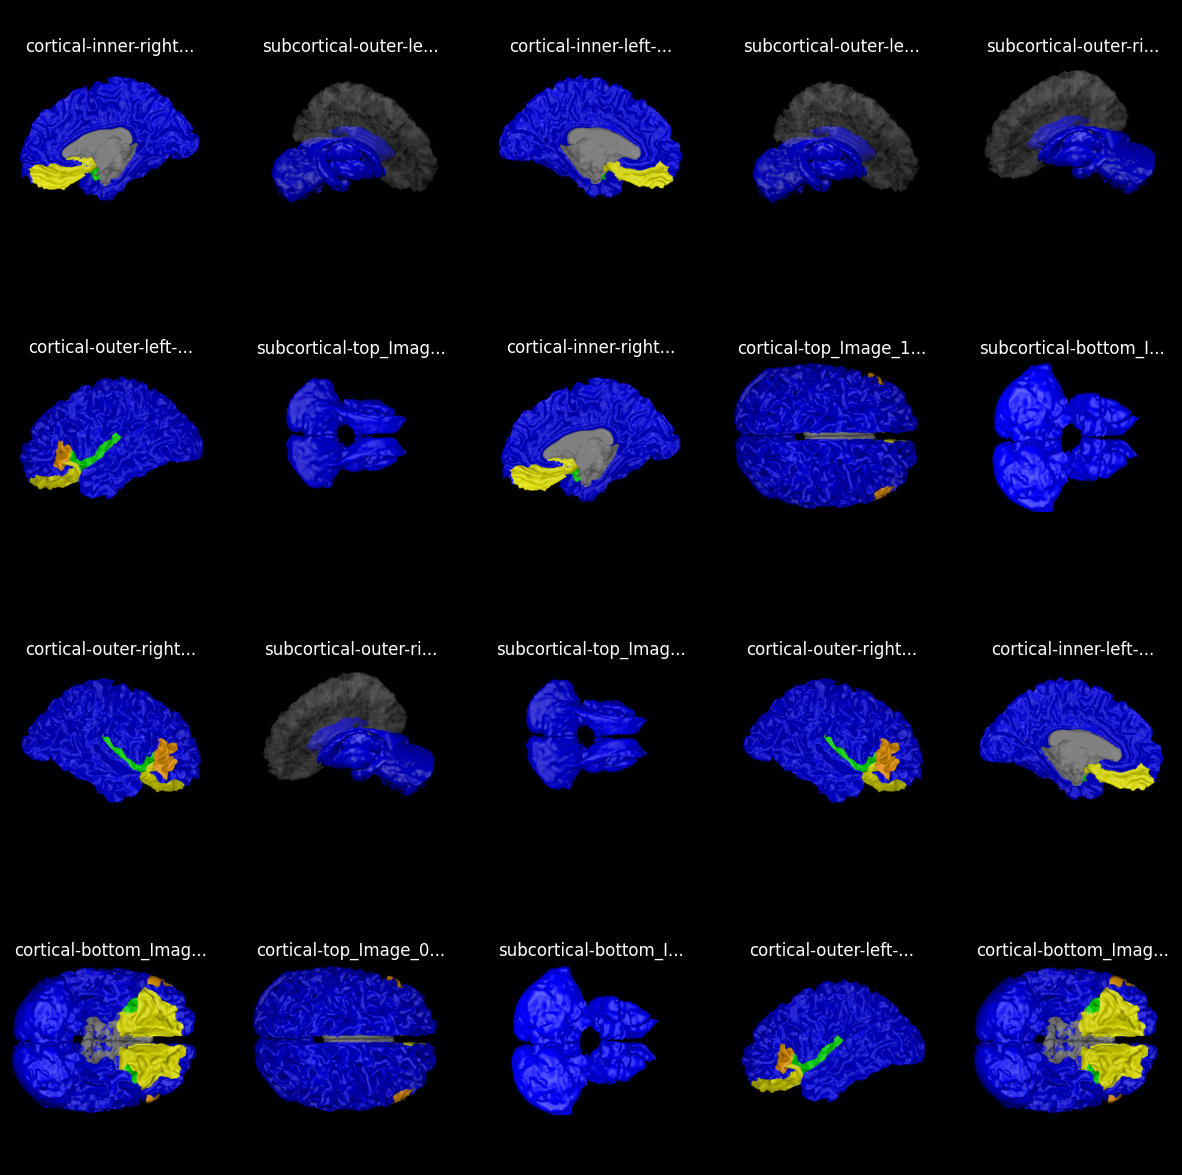

In [ ]:
#@title Display a sample selection of your images.
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join

# get all files (minus directories) from the specified output
onlyfiles = [f for f in listdir(output_folder) if isfile(join(output_folder, f))]

images = []

# parse all files for only PNGs
for f in onlyfiles:
    if f.lower().endswith(".png"):
        images.append(f)

# limit total images to display to first 25
images = images[:25]

rows = int(np.ceil(len(images) / 5))
cols = 5

fig, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (15,15))
fig.patch.set_facecolor(background_color)
# plt.rcParams['text.color'] = 'white' if background_color == colors["black"] else 'black'

for a in range(len(axs)):
    for b in range(len(axs[a])):
        axs[a][b].axis("off")

for i in range(len(images)):
    output_directory = output_folder + "/" + images[i]

    img = np.asarray(Image.open(output_directory))
    ax = fig.add_subplot(rows, cols, i + 1)

    title = images[i][:20] + "..."
    ax.set_title(title, color = 'white' if background_color == 'black' else 'black')
    plt.axis("off")
    plt.imshow(img)

plt.show()

In [ ]:
#@title Generate a video representation of your different views (saved in the "gif" folder)

from PIL import Image
import imageio
import os

if not os.path.exists("gif"):
    os.mkdir("gif")

# Get a list of image files in the directory
image_files = [filename for filename in os.listdir(output_folder) if filename.endswith('.png')]

# Create a dictionary to group images by their common prefix
image_groups = {}

# Iterate through image files and group them by their prefixes
for image_file in image_files:
    # Extract the prefix by splitting at '_' and taking the first part
    prefix = image_file.split('_')[0]

    # If the prefix is not in the dictionary, create a new list
    if prefix not in image_groups:
        image_groups[prefix] = []

    # Add the image file to the corresponding group
    image_groups[prefix].append(image_file)

# Process each group and create a GIF for each
for prefix, image_group in image_groups.items():
    # Sort the images within the group alphabetically
    image_group = sorted(image_group)

    # Create a list to store image objects
    images = []

    # Open and append each image to the list
    for image_file in image_group:
        img = Image.open(os.path.join(output_folder, image_file))
        images.append(img)

    # Output GIF file path for this group
    output_gif = f'{prefix}.gif'

    # Save the list of images as a GIF
    imageio.mimsave("gif" + "/" + output_gif, images)

In [ ]:
#@title When you are satisfied, press the play button to download your images in a zip file.
import shutil
shutil.make_archive(output_folder, 'zip', output_folder)

folder = output_folder + ".zip"

files.download(folder)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>